In [13]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger


file="basic"
traindir="datasets/multiclass_train"
testdir="datasets/multiclass_test"

traindata = pd.read_csv(f"{traindir}/processed/{file}.csv")
testdata = pd.read_csv(f"{testdir}/processed/{file}.csv")
testdata
traindata
n=len(traindata.count())
print(f"no of attributes are {n}")

no of attributes are 16


In [14]:
X = traindata.iloc[:,0:n-5]
Y = traindata.iloc[:,n-5:n]
C = testdata.iloc[:,0:n-5]
T = testdata.iloc[:,n-5:n]
Y.shape

(125973, 5)

In [15]:
# 1. define the network
model = Sequential()
model.add(Dense(32,input_dim=n-5,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(24,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(5, activation='softmax'))

In [16]:
# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(X, Y,batch_size=4000,epochs=100,validation_split=0.2)

model.save(f"{testdir}/processed/{file}.hdf5")

import dill as pickle
with open('history', 'wb') as file_pi:
    pickle.dump(f"{testdir}/processed/{file}.history", file_pi)

Train on 100778 samples, validate on 25195 samples
Epoch 1/100
100778/100778 [==============================] - 0s 4us/step - loss: 1.5376 - accuracy: 0.4507 - val_loss: 1.4005 - val_accuracy: 0.5338
Epoch 2/100
100778/100778 [==============================] - 0s 2us/step - loss: 1.2890 - accuracy: 0.5360 - val_loss: 1.1447 - val_accuracy: 0.5424
Epoch 3/100
100778/100778 [==============================] - 0s 3us/step - loss: 1.0187 - accuracy: 0.5518 - val_loss: 0.8889 - val_accuracy: 0.5667
Epoch 4/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.8078 - accuracy: 0.7555 - val_loss: 0.7246 - val_accuracy: 0.8573
Epoch 5/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.6761 - accuracy: 0.8503 - val_loss: 0.6181 - val_accuracy: 0.8642
Epoch 6/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.5873 - accuracy: 0.8597 - val_loss: 0.5505 - val_accuracy: 0.8640
Epoch 7/100
100778/100778 [============================

100778/100778 [==============================] - 0s 2us/step - loss: 0.3127 - accuracy: 0.8907 - val_loss: 0.3030 - val_accuracy: 0.8970
Epoch 56/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.3115 - accuracy: 0.8912 - val_loss: 0.3020 - val_accuracy: 0.8973
Epoch 57/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.3108 - accuracy: 0.8909 - val_loss: 0.3012 - val_accuracy: 0.8972
Epoch 58/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.3099 - accuracy: 0.8921 - val_loss: 0.3003 - val_accuracy: 0.8974
Epoch 59/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.3093 - accuracy: 0.8910 - val_loss: 0.2997 - val_accuracy: 0.8940
Epoch 60/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.3084 - accuracy: 0.8913 - val_loss: 0.2992 - val_accuracy: 0.8975
Epoch 61/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.3075 - accuracy: 0.8927 - val

In [17]:

import tensorflow as tf
C = testdata.iloc[:,0:n-5]
T = testdata.iloc[:,n-5:n]
_, accuracy = model.evaluate(C,T)
print('Accuracy: %.2f' % (accuracy*100))
prediction=model.predict_classes(C)


22542/22542 [==============================] - 0s 14us/step
Accuracy: 65.81


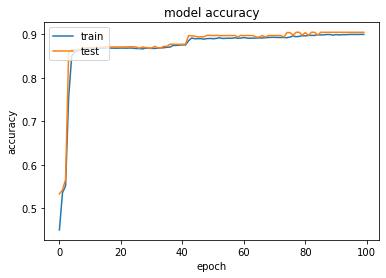

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

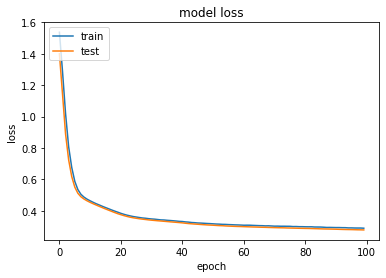

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
p=model.predict(C[0:1])
p=np.rint(p)

print(p)
print(T.shape)
rounded_labels=np.argmax(T.to_numpy(),axis=1)
prediction=model.predict(C)
prediction=np.rint(prediction)
prediction

[[1. 0. 0. 0. 0.]]
(22542, 5)


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [21]:
from sklearn.metrics import multilabel_confusion_matrix
prediction=np.rint(prediction)
original_value=np.rint(T)
cm=multilabel_confusion_matrix(original_value, prediction)
cm

array([[[13762,  1321],
        [ 2235,  5224]],

       [[ 8695,  4137],
        [  993,  8717]],

       [[17975,  2146],
        [ 1567,   854]],

       [[19652,     5],
        [ 2885,     0]],

       [[22475,     0],
        [   67,     0]]], dtype=int64)